## Breast Cancer Classification
### @author Ilker Atik
### In this work UCI's Breast Cancer Wisconsin (Diagnostic) dataset is used.
### Link to dataset: http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29


In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as  sns
import matplotlib.pyplot as plt
columns = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean",\
    "radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se",\
    "radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

data = pd.read_csv('wdbc.data',names=columns)

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
#finding missing datas
empty_cells = data.isnull().sum()
print(empty_cells)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [84]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0}) # Coding malign as 1 and benign as 0
data_y = data.iloc[:,1] # Second column is the predicting field


data_x = data.iloc[:,2:]
data_x_mean = data.iloc[:,2:12]
data_x_se = data.iloc[:,12:22]
data_x_worst = data.iloc[:,22:32]
data_y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

<AxesSubplot:>

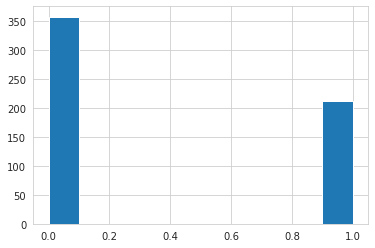

In [85]:
data_y.hist()

<AxesSubplot:>

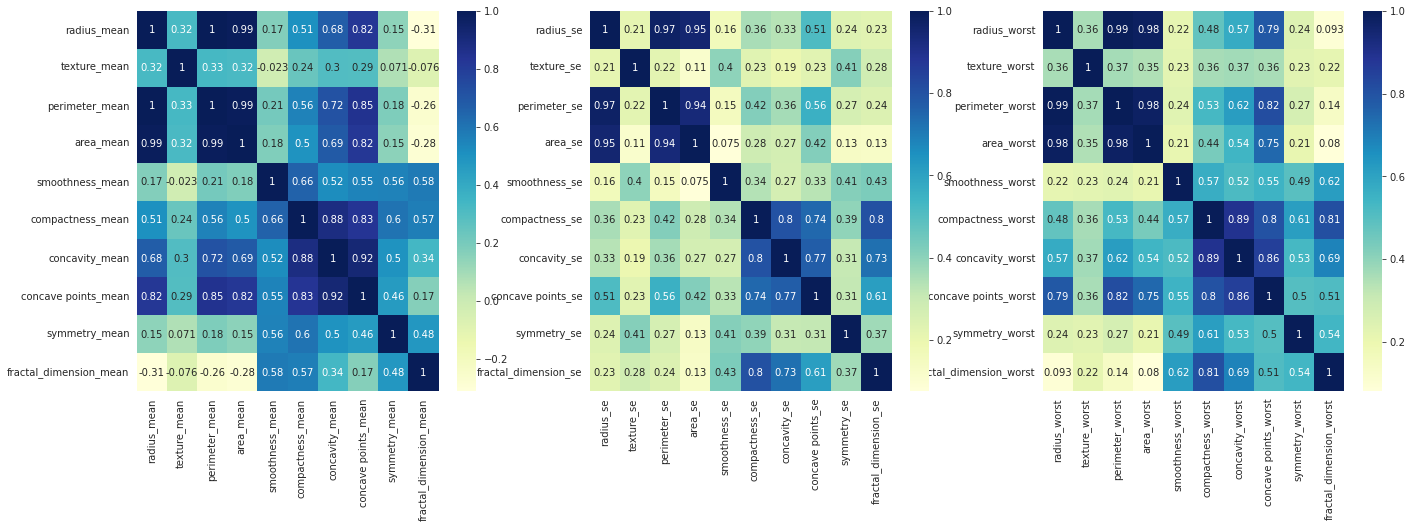

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(23, 7))
sns.heatmap(data_x_mean.corr(), ax=axes[0], annot=True, cmap="YlGnBu")
sns.heatmap(data_x_se.corr(), ax=axes[1], annot=True, cmap="YlGnBu")
sns.heatmap(data_x_worst.corr(), ax=axes[2], annot=True, cmap="YlGnBu")

## As you can see from the heatmap above, radius, perimeter and area is correlated as expected.

<AxesSubplot:>

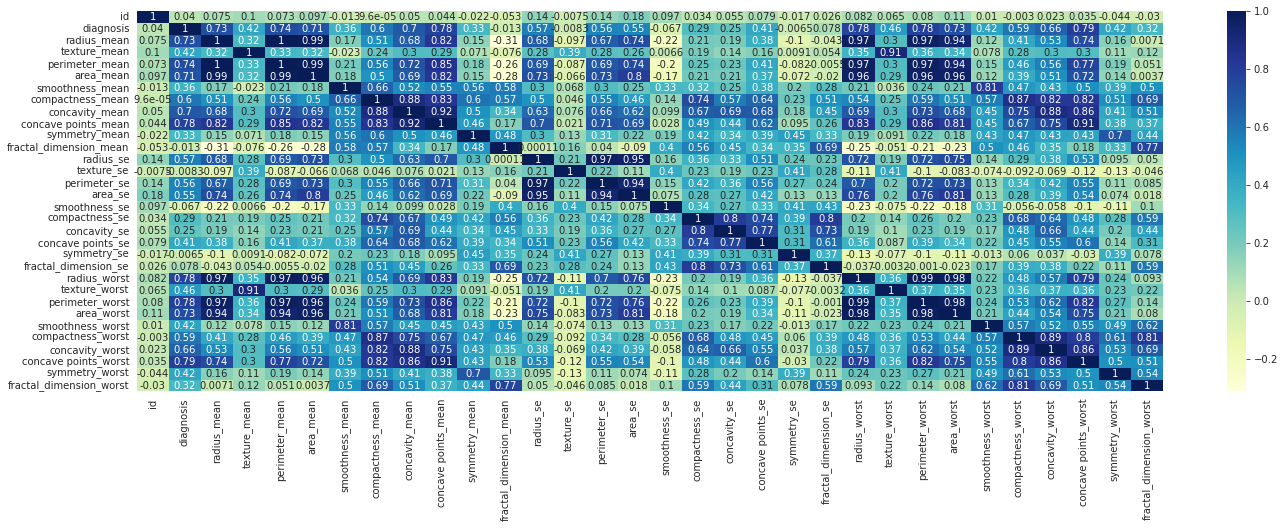

In [87]:
fig, axes = plt.subplots(1, 1, figsize=(23, 7))
sns.heatmap(data.corr(),ax=axes, annot=True, cmap="YlGnBu")

In [88]:
# Printing the 10 features that correlates with diagnosis the most
corr = data.corr()
print(corr.iloc[1,:].nlargest(10))

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64


In [89]:
# Printing mean values of features grouped by rows diagnosis value
data.iloc[:,1:].groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
